# Add Assignments From an Existing Layer¶
In this example, features in an existing layer on ArcGIS Online, representing crosswalks that need to be painted, will be imported into a Workforce Project as assignments.

### Import ArcGIS API for Python
Import the `arcgis` library and some modules within it.

In [1]:
from datetime import datetime
import pandas as pd
from arcgis.gis import GIS
from arcgis.apps import workforce

### Connect to Organization and get the Project¶
Let's connect to ArcGIS Online and find the new Project to add assignments to.

In [2]:
gis = GIS("https://arcgis.com", "workforce_scripts")
item = gis.content.get("29f2f056e5e04ba383e59737b3f8b340")
project = workforce.Project(item)

Enter password: ········


### Query the Feature Layer to Find Crosswalks That Need to be Painted¶
Let's fetch the layer containing the crosswalks, query all of the crosswalks, and then display the crosswalks on a map. Workforce stores assignments in WGS84 Web Mercator so let's ensure that the returned geometries are using that spatial reference.

In [3]:
layer = gis.content.get("2ec0051ba3834714a639365dace5c4c0").layers[0]
crosswalks = layer.query("1=1", out_sr=3857, as_df=True)
crosswalks

,OBJECTID,SHAPE,description,location,priority
0,1,"{""x"": -13042100.444693483, ""y"": 3856655.475106...",The lines need to be re-painted,6th Ave & K St,3
1,2,"{""x"": -13040238.93433077, ""y"": 3856927.4834379...",The cross walks need to be re-painted,Island Ave & 24th St,3
2,3,"{""x"": -13039276.604087984, ""y"": 3855691.054789...",New lines need to be painted here.,Ocean View Blvd & South 28th St,1
3,4,"{""x"": -13042522.117323115, ""y"": 3858883.420402...",A new crosswalk should be painted here,2nd Ave & Fir St,1
4,5,"{""x"": -13039290.712094398, ""y"": 3857929.525105...",The cross walk needs cross-lines painted,B St & 28th St,2



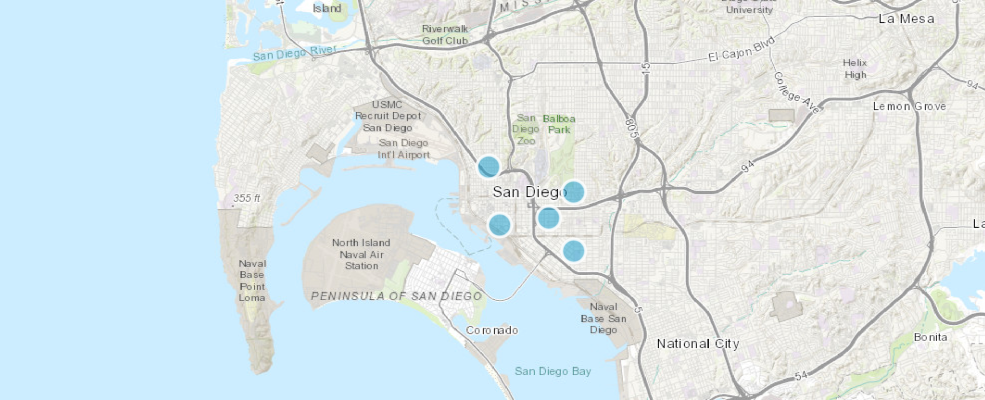

In [4]:
crosswalk_map = gis.map("San Diego, CA", zoomlevel=12)
crosswalk_map.add_layer(layer)
crosswalk_map


### Create an Assignment for Each Feature
For each assignment, let's use the geometry and attributes of the existing feature to create the assignment. Then let's use the batch_add method to add multiple assignments at once (this is faster than using the add method since validation is performed once for all assignments).

In [5]:
assignments = []
for index, row in crosswalks.iterrows():
    assignments.append(
        workforce.Assignment(
            project,
            geometry=row["SHAPE"],
            location=row["location"],
            description=row["description"],
            priority=int(row["priority"]),
            assignment_type="Paint Crosswalk",
            status="unassigned"
        )
    )
project.assignments.batch_add(assignments)

[<Assignment 37>,
 <Assignment 38>,
 <Assignment 39>,
 <Assignment 40>,
 <Assignment 41>]

### Verify Assignments on the Map


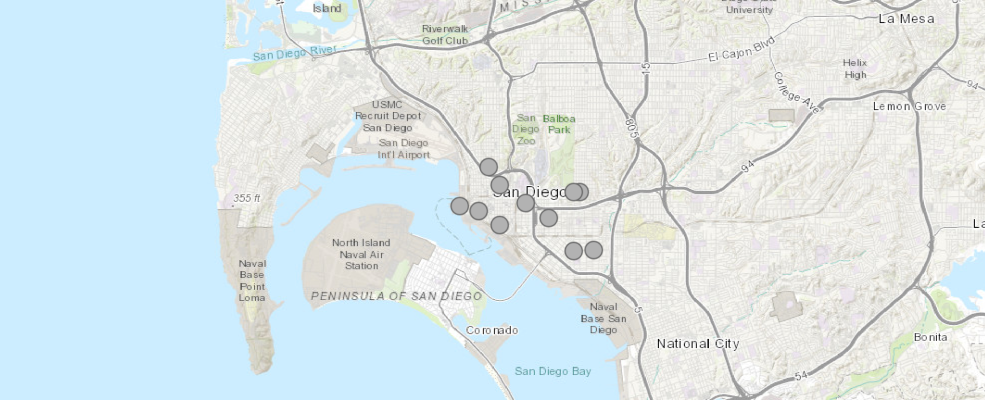

In [6]:
webmap = gis.map("San Diego, CA", zoomlevel=12)
webmap.add_layer(project.assignments_layer)
webmap